# **7 taps FIR filter for symmetric coefficients in VHDL**
## fpga management

project for MAPD, A.Y. 2021/22

In [1]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
## define the I/O ##
usb_int = '/dev/ttyUSB1'

# data directory
dir_files = '../demo/'
# waveform to test:
template_waveform_file = dir_files + 'waveform_sample_sine.txt'
# fpga outputs
fpga_waveform1 = dir_files + 'fpga_sampling_tmp.txt'

### **programming the FPGA**

Call Vivado from command line & load the predefined bitstream. We suggest to put the FIR in *programming mode* (SW0 closed, red led steady).

In [5]:
!./program_fpga.sh


****** Vivado v2018.3 (64-bit)
  **** SW Build 2405991 on Thu Dec  6 23:36:41 MST 2018
  **** IP Build 2404404 on Fri Dec  7 01:43:56 MST 2018
    ** Copyright 1986-2018 Xilinx, Inc. All Rights Reserved.

^C


## **set the fir coefficients**

The lowpass coefficients are computed using a scipy function (firwin). Then the coefficients are sent to the FPGA.

**NOTE**: run te following cell while the FPGA is in *programming mode* (SW0 closed, red led active). If the operation is successful, the led should turn purple.

In [6]:
!./write_coefficients.py --usb $usb_int -c 0 8 32 48

 >> using interface /dev/ttyUSB1
 >> coefficients:  [ 0  8 32 48]
 << serial >>
.
.
.
.
>> end of buffer


![fpga_programming](../img/fpga_mode_programming.png)

## **feed data**

**NOTE**: Now switch the FPGA to *filter mode* (SW0 opened, green led active).

In [3]:
!./send_data_fpga.py -i $template_waveform_file -o $fpga_waveform1

 >> using interface /dev/ttyUSB1
 === ../demo/waveform_sample_sine.txt  -> FPGA ->  ../demo/fpga_sampling_tmp.txt ===
 > read values from file ../demo/waveform_sample_sine.txt
 > 207 values acquired
 << serial >>
.
.
.
.
.
.
.
.
.
.
.
>> end of buffer


![fpga_programming](../img/fpga_mode_filter.png)

#### waveform visualization

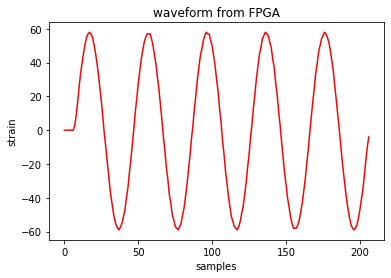

In [4]:
fpga_wave = np.loadtxt(fpga_waveform1)
fpga_wave = fpga_wave 

plt.plot( np.arange(len(fpga_wave)), fpga_wave, color='r')
plt.xlabel('samples'); plt.ylabel('strain'); plt.title('waveform from FPGA');
plt.show()

End of file